# Training Models

#### In this chapter,we will start by looking at the Linear Regression model,one of the simplest models there is.

### Normal Equation

In [ ]:
# to find the value of Ɵ that minimize the cost function,there is a closed-form solution -
# in other words,a mathematical equation that gives the result directly.this is called the normal equation.



#ŷͥ = Ɵ˳ + Ɵࢭx
#  Ɵ˳ is the intercept and Ɵࢭ is the slope of the line.
#  Ɵ hat, is the value of Ɵ  that minimizes the cost function.
#  y is the vector of target values containing y (1) to y (m).


#Ɵ = temp_1.dot(temp_2)

In [84]:
#let's generate some linear-looking data to test equation on:

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

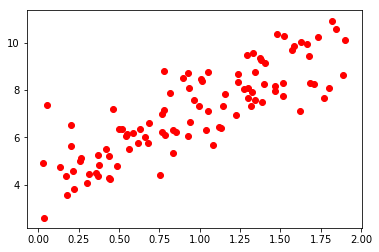

In [85]:
from matplotlib import pyplot as plt
plt.scatter(X,y,color='red')

In [86]:
# Now let's compute Ɵ-hat using the Normal Equation.we will use the inv() function from NumPy's Linear Algebra module(
# np.linalg) to compute the inverse of a matrix,and the dot() method for matrix multiplication:


X_b = np.c_[np.ones((100, 1)), X]  #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

In [87]:
# The actual function that we used to generate the data is y = 3 + 4x1 + Gaussian noise.
# Let's see what the equation found:


theta_best

array([[4.192785  ],
       [3.01995866]])

In [14]:
# We would have hoped for Ɵ0 = 4 and Ɵ1 = 3 instead of Ɵ0 = 3.788 and Ɵ1 = 3.161. close enough,but the noise made 
# it impossible to recover the exact parameters of the original function.

In [89]:
# Now you can make predictions using Ɵ-hat^ :

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]    # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.192785  ],
       [10.23270232]])

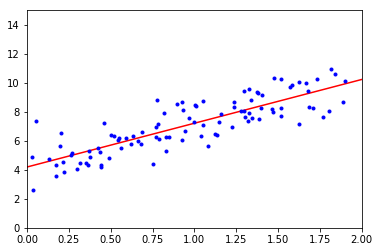

In [90]:
# let's plot this model's preductions:

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [91]:
# Performing linear regression using Scikit-Learn is quite simple:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.192785]), array([[3.01995866]]))

In [92]:
lin_reg.predict(X_new)

array([[ 4.192785  ],
       [10.23270232]])

# Gradient Descent

In [32]:
# The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
# an important parameter in Gradient Descent is the size of the steps,determined by the learning rate hyperparameter.
#if the learning rate is too small,then the algorithm will have to go through many iterations to converge,which will 
#take a long time.
#of the other hand, if the learning rate is too high,you might jump across the valley and end up on the other side,
#possibly even higher up than you were before.this might make the algorithm diverge,with larger and larger values, 
#failing to find a good solution.
# When using Gradient Descent,you should ensure that all features have a similar scale(e.g., using scikit-learn's 
# StandardScaler class), or else it will take much longer to converge.

### Batch Gradient Descent 

In [93]:
#let's look at a quick implementation of this algorithm:

eta = 0.1   #learning rate 
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1)   # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # formule dade shodast az ghabl(Gradient vector of the cost function)
    theta = theta - eta * gradients     #in formulam dade shode az ghabl(Gradient Descent step)
theta

array([[4.15681291],
       [3.05260818]])

In [37]:
#that's exactly what the Normal Equation found! but what if you had used a different learning rate eta? 
#to find a good learning rate,you can use grid search(see chapter 2)

### Stochastic Gradient Descent:

In [38]:
# The main problem with Batch gradient descent is the fact that it uses the whole training set to compute the
#gradients at every step,which makes it very slow when the training set is larg. At the opposite extreme, Stochastic 
#gradient descent just picks a random instance in the training set at every step and computes the gradients based only 
#on that single instance.
#over time it will end up very close to the minimum,but once it gets there it will continue to bounce around,never
#setteling down.so once the algorithm stops,the final parameter values are good,but not optimal.
#Stochastic Gradient descent has a better chance of finding the global minimum than Batch Gradient Descent does.
#therefore randomness is good to scape from local optima,but bad because it means that the algorithm can never settle
#at the minumum.one solution to this dilemma is to gradually reduce the learning rate.


In [94]:
# The code implements Stochastic Gradient Descent using a simple learning schedule:

n_epochs = 50 
t0, t1 = 5, 50   #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)    # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -  yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [95]:
#by convention we iterate by rounds of m iterations; each round is called an epoch.
#while the Batch gradient descent code iterated 1000 times through the whole training set,this code goes through 
#the training set only 50 times and reaches a fairly good solution:

theta

array([[3.86992599],
       [3.32750885]])

In [96]:
# To perform Linear Regression using SGD with Scikit-Learn , you can use the SGDRe gressor class, which defaults 
# to optimizing the squared error cost function.the following code runs 50 epochs, starting with a learning rate 
# of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any 
#regularization (penalty=None; more details on this shortly)


from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [97]:
# Once again,you find a solution very close to the one returned by the Normal Equation:

sgd_reg.intercept_, sgd_reg.coef_

(array([4.19911746]), array([3.02521493]))

### Mini-batch Gradient descent 

In [44]:
# at each step, instead of computing the gradients based on the full training set(as in Batch GD) or based on just one 
#instance(as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.
#the main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization
#of matrix operations, especially when using GPUs.
#don't forget that Batch GD takes a lot of time to take each step,and Stochastic GD and Mini-batch GD would also reach 
#the minimum if you used a good learning schedule.
#(a table of comparison of algorithms for Linear Regression is in book page 123)


## Polynomial Regression

In [45]:
# What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear
# model to fit nonlinear data.A simple way to do this is to add powers of each feature as new features, then train a 
# linear model of this extended set of features. This technique is called Polynomial Regression.

#lert's look at an example.First, let's generate some nonlinear data,based on a simple quadratic equation(plus some noise)
# (A quadratic equation is of the form  y = ax2 + bx + c )


In [112]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [113]:
# Clearly,a straight line will never fit this data properly.So let's use Scikit-Learn's Poly nominialFeatures class to
# transform our training data, adding the square(2nd-degree polynomial) of each feature in the training set as new 
# features(in this case there is just one feature) :

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.78903625])

In [114]:
X_poly[0]

array([-0.78903625,  0.62257821])

In [115]:
# X_poly now contains the original feature of X plus tghe square of this feature.Now you can fit a linearRegression 
# model to this extended training data:

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.71202456]), array([[1.00307872, 0.57104512]]))

In [70]:

#Note bad: the model estimates :
# y(hat)=0.62x1**2 + 1.003x1 + 1.71 when in fact the original function was y = 0.5x1**2 + 1.0x1 + 2.0 + Gaussian noise.


# Learning Curves

In [71]:
# How can you tell that your model is overfitting or underfitting the data?
# in chapter 2 you used cross-validation to get an estimate of a model's generalization performance.
# If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, 
# then your model is overfitting. If it performances poorly on both, then it is underfitting.this is one way to tell 
# when a model is too simple or too complex.

# Another way is to look at the learning curves:  there are plots of the model's performace on the training set and 
# the validation set as a function of the training set size . To generate the plots,simply train the model several 
# times on differnet sized subsets of the training set. The following code defines a function that plots the learning 
# curves of a model given some training data:



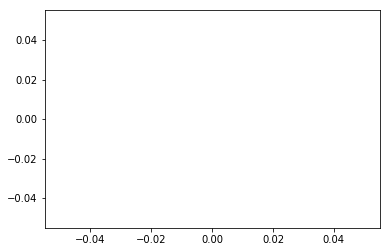

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors= [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")



In [117]:
#let's look at the learning curves of the plain Linear Regression model:

line_reg = LinearRegression()
plot_learning_curves(line_reg, X, y)

In [118]:
# ???????????? I have no idea why there is nothing on the plot!!!!!

In [119]:
# If your model is underfitting the training data,adding more training examples will not help. you need to use a more 
#complex model or come up with better features.


In [123]:
# Now let's look at the learning curves of a 10th-degree polynomial model on the same data:

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False))
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

TypeError: 'tuple' object is not callable

## Regularized linear Models

In [124]:
# as we see in chapter 1,2, a good way to reduce overfitting is to regularize the model.
# for a linear model, regularization is typically achieved by constraining the weights of the model.we will now look 
# at Ridge Regression, Lasso Regression, and and Elastic Net, which implement three different ways to constrain the 
# weights.


## Ridge Regression

In [125]:
# Ridge Regression is a regularized version of linear Regression.


In [128]:
# Here is how to perform Ridge Regression with Scikit-learn using a closed-form solution:


from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[5.38315784]])

In [132]:
# And using Stochastic Gradient Descent:

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.50327815])

In [133]:
# The penalty hyperparameter sets the type of regularization term to use.Specifying "l2" indicates that you want SGD to
#add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector: this is
# simply Ridge Regression.


# Lasso Regression

In [134]:
# Least Absolute Shrinkage and Selection Operator Regression(LASSO) is another regularized version of Linear 
# Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm 
# of the weight vector instead of half the square of the l2 norm.


In [135]:
# Here is a small Scikit-learn example using the Lasso class. Note that you could instead use an SGDRegressor(penalty="l1").


from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.34443054])

In [136]:
sgdr_reg = SGDRegressor(penalty='l1')
sgdr_reg.fit(X, y.ravel())
sgdr_reg.predict([[1.5]])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.50671809])

## Elastic Net

In [ ]:
# Elastic Net is a middle ground between Ridge Regression and Lasso Regression.when ration(r)=0, Elastic Net is equivalent
# to Ridge, and when r = 1,it is equivalent to Lasso Regression.

In [137]:
# Here is a short examle using Scikit-Learn's ElasticNet(l1_ratio corresponds to the mix ratio r):

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.34189926])

## Early Stopping

In [138]:
# A very different way to regularize iterative learning algorithms such as gredient Descent is to stop training as 
# soon as the validation error reaches a minimum.this is called early stopping. 

In [ ]:
# here is a basic implementation of early stopping:

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False))
    ("std_scaler", StandardScaler()) ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error :
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = Clone(sgd_reg)



In [144]:
#Note that with warm_strat=True,when the fit() method is called is called,it just continues training where it left off 
# instead of restarting from scratch.


# Logistic Regression

In [ ]:
# As we discussed in chapter 1, some regression algorithms can be used for classification as well. Logistic Regression 
# is commonly used to estimate the probability that an instance belongs to a particular class.
# If the estimated probability is greater than 50% , then the model predicts that the instance belongs to that class(labeled "1"),
# or else it predicts that it does not(labeled "0").


### Estimating Probabilities

In [ ]:
# so how does it work? just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the 
# input features. but instead of outputting the result directly like the linear regression model does, it outputs the 
# logistic of this result.  (formula is in book page-138)

### Training and Cost Function

In [ ]:
#The objective of training is to set the parameter vector Ɵ so that the model estimates high probabilities for positive 
#instances(y=1) and low probabilities for negative instances(y=0)

## Decision Boundaries 

In [ ]:
# Let's use the iris dataset to illustrate Logistic Regression. this is a famous dataset that contain the sepal and petal 
#length and width of 150 iris flowers of three different species: Iris-Setosa,Iris-Versicolor,and Iris-Virginica.
# Let's try to build a classifier to detect the Iris-Virginica type based only on the petal width feature.First let's 
#load the data:


In [145]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [148]:
X = iris["data"][:, 3:]   #petal width
y = (iris["target"] == 2).astype(np.int)   # 1 if Iris-virginica, else Ɵ

In [149]:
# Now let's train a Logistic Regression model

In [151]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

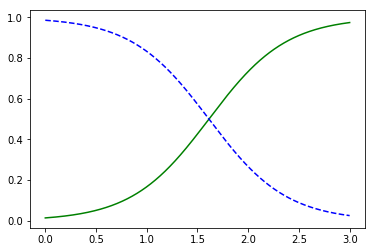

In [152]:
#let's look at the model's estimated probabilities for flowers with petal width varying from 0 to 3 cm:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label='Not Iris-Virginica')
# + more Matplotlib code to make the image look pretty

In [153]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])